In [205]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#import geopandas as gpd
import urllib.request
import json
#import folium
from IPython.display import Image
#import contextily as ctx
from matplotlib.colors import ListedColormap
# load data
data = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep="\t")
data.head()

/var/folders/t9/_x5y2dys63b6nz3nw8l_vrsh0000gn/T/ipykernel_7729/3193876165.py:16: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep="\t")


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [206]:
len(data)

84878

In [272]:
# get rid of some columns we may not need (for now)
clean_data = data[data['Min Age'] <= 25]

# len(clean_data): 84606

cols_to_drop = ['Logo Url', 'Contact Phone', 'Registration Open', 'Registration Deadline', 'Registration Url', 
                'Program Url', 'Online Address', 'Address', 'State', 'Contact Name', 
                'Contact Email', 'Contact Phone', 'City']

# Drop the columns from the DataFrame
clean_data = clean_data.drop(columns=cols_to_drop)

clean_data['Geographic Cluster Name'] = clean_data['Geographic Cluster Name'].replace(
    ['AUSTIN','NORTH LAWNDALE','HUMBOLDT PARK', 'EAST GARFIELD PARK','WEST PULLMAN','ENGLEWOOD','AUBURN GRESHAM','WEST GARFIELD PARK',     'ROSELAND','GREATER GRAND CROSSING','WEST ENGLEWOOD','SOUTH SHORE','NEW CITY','CHICAGO LAWN','SOUTH LAWNDALE','ENGLEWOOD'],
    ['*AUSTIN','*NORTH LAWNDALE','*HUMBOLDT PARK', '*EAST GARFIELD PARK','*WEST PULLMAN','*ENGLEWOOD','*AUBURN GRESHAM','*WEST GARFIELD PARK',     '*ROSELAND','*GREATER GRAND CROSSING','*WEST ENGLEWOOD','*SOUTH SHORE','*NEW CITY','*CHICAGO LAWN','*SOUTH LAWNDALE','*ENGLEWOOD'])



In [273]:
clean_data['Start Date'] = pd.to_datetime(clean_data['Start Date'], format='%m/%d/%y')

months = clean_data['Start Date'].dt.month

seasons = []
for month in months:
    if month in [12, 1, 2]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    else:
        seasons.append('fall')

In [289]:
clusters = clean_data['Geographic Cluster Name'].unique()
num_programs_list = []

# Loop through each cluster and count the unique 'Program Name' values
for cluster in clusters:
    # Filter the data for the current cluster
    cluster_data = clean_data[clean_data['Geographic Cluster Name'] == cluster]
    
    # Group the data by 'Program Name'
    grouped_data = cluster_data.groupby(['Program Name'])
    
    # Count the number of unique 'Program Name' values
    num_programs = grouped_data.size().reset_index(name='count')['count'].nunique()
    
    # Append the number of unique 'Program Name' values to the list
    num_programs_list.append(num_programs)

39
17
0
17
27
26
12
16
14
44
60
28
21
15
23
15
21
14
10
13
20
17
19
20
16
17
13
14
20
23
21
15
10
12
16
20
19
22
20
15
17
24
12
16
11
11
36
17
12
22
13
12
15
18
22
11
18
15
13
16
17
17
16
20
11
9
15
28
19
13
25
9
18
18
11
11
6
2
4
1


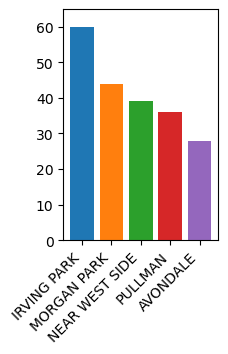

In [311]:
num_programs_array = np.array(num_programs_list)

#Find the 10 clusters with the most programs
top_indices = np.argsort(-num_programs_array)[:5]

#Graph the 10 clusters with the most programs
plt.figure(figsize=(2,3), facecolor = 'none')
plt.bar(data=data.reset_index(), x=clusters[top_indices], height=num_programs_array[top_indices].tolist(), color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 65)
plt.show()





In [312]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

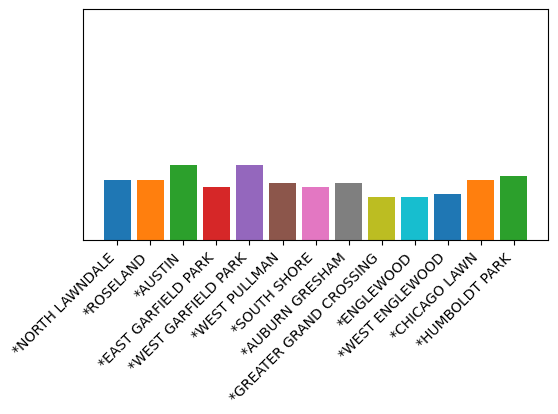

In [316]:
#Graph the 20 target clusters (according to MCMF) and their number of programs
plt.figure(figsize=(6,3), facecolor = 'none')
plt.bar(data=data.reset_index(), x=clusters[target_indices], height=num_programs_array[target_indices].tolist(), color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 65)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

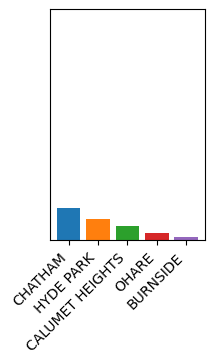

In [315]:
#Find the 10 clusters with the least programs
bottom_indices = np.argsort(num_programs_array)[:6]

#Graph the 10 clusters with the fewest programs
plt.figure(figsize=(2,3), facecolor = 'none')
plt.bar(data = data.reset_index(), x = (np.flip(clusters[bottom_indices]).astype(str))[:-1], 
        height = np.flip(num_programs_array[bottom_indices]).tolist()[:-1], color = colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 65)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

In [305]:
targets = ['*AUSTIN','*NORTH LAWNDALE','*HUMBOLDT PARK', '*EAST GARFIELD PARK','*WEST PULLMAN','*ENGLEWOOD',           
           '*AUBURN GRESHAM','*WEST GARFIELD PARK','*ROSELAND','*GREATER GRAND CROSSING','*WEST ENGLEWOOD',
           '*SOUTH SHORE','*NEW CITY','*CHICAGO LAWN','*SOUTH LAWNDALE']
i = 0
target_indices = []
while i < len(clusters.tolist()):
    if clusters.tolist()[i] in targets:
        target_indices.append(i)
        print(clusters.tolist()[i])
        print(i)
        i += 1
    else:
        i += 1


*NORTH LAWNDALE
1
*ROSELAND
3
*AUSTIN
12
*EAST GARFIELD PARK
13
*WEST GARFIELD PARK
16
*WEST PULLMAN
24
*SOUTH SHORE
39
*AUBURN GRESHAM
43
*GREATER GRAND CROSSING
48
*ENGLEWOOD
51
*WEST ENGLEWOOD
58
*CHICAGO LAWN
60
*HUMBOLDT PARK
73


In [306]:
len(clusters[target_indices])

13